# Introduction to Data Science – Lecture 14: Classification 1
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

In this lecture, we'll discuss:
* a general overview of classification  
* k nearest neighbors (k-NN)
* decision trees 
* generalizability and cross validation 

Recommended Reading: 
* G. James, D. Witten, T. Hastie, and R. Tibshirani, An Introduction to Statistical Learning, Ch. 4 [digital version available here](https://www.statlearning.com/)


In [6]:
# imports and setup

import scipy as sc
import pandas as pd
import statsmodels.formula.api as sm

import matplotlib.pyplot as plt
import matplotlib.colors 
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.datasets import make_moons, load_iris
from sklearn.model_selection import train_test_split

## Classification 

Recall that in **regression**, we try to predict a real-valued (quantitative) variable. Examples:
* Predict house prices based on attributes
* Predict credit score rating based on income, balance, gender, education, etc...

In **classification**, we try to predict a categorical (qualitative) variable. Examples:
* Predict whether a bank should issue a person a credit card (yes/no)
* Predict a hospital patient's diagnosis (stroke, heart attack,...) based on symptoms. 

We assume a dataset with $n$ samples $(x_1,y_1), (x_2,y_2),\ldots,(x_n,y_n)$, where $x_i$ are attributes or features and $y_i$ are categorical variables that you want to predict. 

Our Goal is to develop a rule for predicting the categorical variable $y$ based on the features $x$. 

For example, can we predict whether or not a student will be admitted to a graduate program based on their undergraduate performance (GPA, GRE score, prestige of student's undergraduate university)? 

Or, for example, the post office uses classification of hand-written zip codes to automatically sort mail. The digits of the zip code are photographed, the picture serves as your data vector, and the picture is then assigned to one of the *classes:* $0,1,2,\ldots,9$. 

In the next couple lectures, we'll cover several classification methods:
* k-nearest neighbors
* trees and random forests
* logistic regression (time permitting)
* support vector machines (SVM) 
* Neural Networks and Deep Learning

We'll see that Neural Networks can be used for both regression and classification. 

Today we will be covering k-nearest neighbors and decision trees. 

## K–Nearest Neighbors (k-NN) 

**Idea:** To decide the class of a given point, find the k nearest neighbors of that point, and let them "vote" on the class. That is, we assign the class to the sample that is most common among its k nearest neighbors. 

**Considerations:**
* We must pick k, the number of voting neighbors (typically a small number, say k=10)
* 'Nearest' means closest in distance, so there is some flexibility in defining the distance
* There are different ways to vote. For example, of the k nearest neighbors, I might give the closest ones more weight than farther ones. 
* We have to decide how to break ties in the vote. 

### Example: Classifying Two Moons

Let's consider a synthetic dataset in the shape of "two moons". Here, each sample has two pieces of information: 
* the *features*, denoted by $x_i$, which are just a two-dimensional coordinate and 
* a *class*, denoted by $y_i$, which is either 0 and 1. 

(500, 2) (500,)
[[ 0.50316464  0.11135559]
 [ 1.06597837 -0.63035547]
 [ 0.95663377  0.58199637]
 [ 0.33961202  0.40713937]
 [ 2.17952333 -0.08488181]
 [ 2.00520942  0.7817976 ]
 [ 0.12531776 -0.14925731]
 [ 1.06990641  0.36447753]
 [-0.76391099 -0.6136396 ]
 [ 0.55678871  0.8810501 ]]
[1 1 0 0 1 1 1 0 0 0]


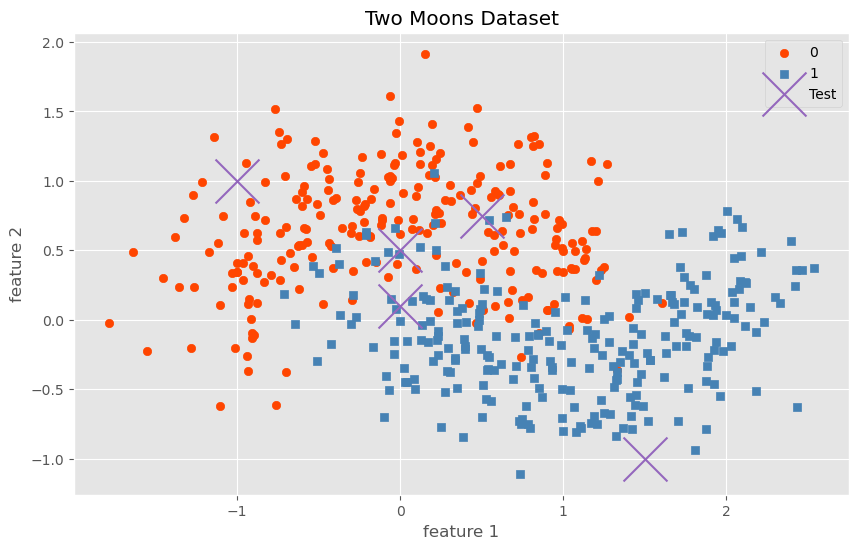

In [47]:
# there are two features contained in X and the labels are contained in y
X,y = make_moons(n_samples=500,random_state=1,noise=0.3)

# X is a 500x2 numpy.ndarray containing the coordinates for each sample
# y is a 500x1 numpy.ndarray containing the class for each sample
print(np.shape(X), np.shape(y))
print(X[:10])
print(y[:10])

# Plot the data, color by class
plt.scatter(X[y == 0, 0], X[y == 0, 1], color="OrangeRed", marker="o",label="0")
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="SteelBlue", marker="s",label="1")

test1 = [1.5,-1] # should be 1
test2 = [-1,1] # should be 0
test3 = [0,0.1] # borderline, probably 1
test4 = [0,0.5] # borderline, probably 0 
test5 = [0.5,0.75] # borderline, probably 0 
test = [test1, test2, test3, test4, test5]

plt.scatter([x[0] for x in test], [y[1] for y in test], color="tab:Purple", marker="x",label="Test", s=1000)
    

plt.legend(scatterpoints=1)

plt.title('Two Moons Dataset')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.show()

We will use **SciKit Learn**, a very very popular python Machine Learning library for most classification tasks. Check out the [website and the documentation](https://scikit-learn.org/stable/).

![](scikit-learn-logo.png)

Here, we will use the [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier).


In [50]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# Here we initialize the model. The key parameter is the number of neighbors (k) to consider. 
model = KNeighborsClassifier(n_neighbors = 100)
# Here we train the model with the data (X) and the labels (y)
model.fit(X, y)

# We can then use new, never before seen data to make predictions
print(test1, "expected 1, predicted:", model.predict([test1]))
print(test1, "expected 1, predicted:", model.predict([test1]))
print(test2, "expected 0, predicted:", model.predict([test2]))
print(test3, "borderline 1, predicted:", model.predict([test3]))
print(test4, "borderline 0, predicted:", model.predict([test4]))
print(test5, "borderline 0, predicted:", model.predict([test5]))

[1.5, -1] expected 1, predicted: [1]
[1.5, -1] expected 1, predicted: [1]
[-1, 1] expected 0, predicted: [0]
[0, 0.1] borderline 1, predicted: [1]
[0, 0.5] borderline 0, predicted: [0]
[0.5, 0.75] borderline 0, predicted: [0]


Try out the above code with different levels of k, in particular very low k-values of 1 or 2. 

We can also plot **decision boundaries** for classifiers, which is a very intuitive method in 2D to understand what's going on: 

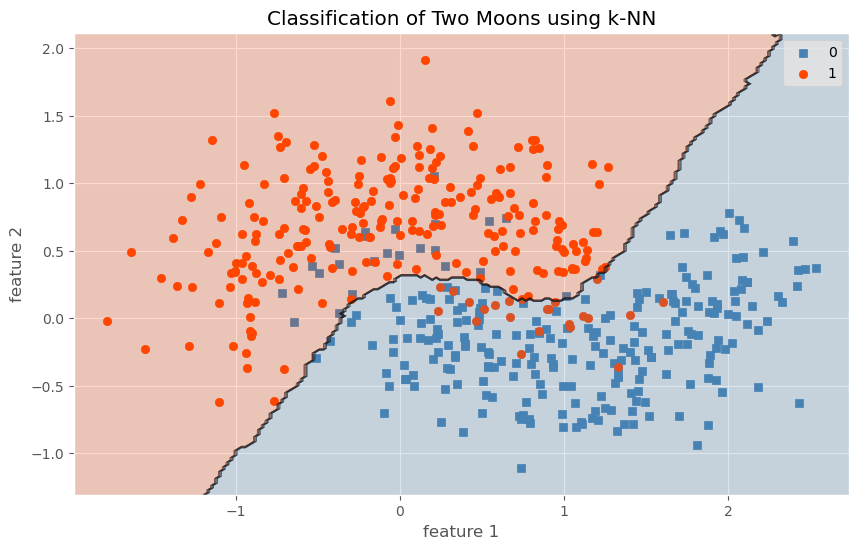

In [54]:
model = KNeighborsClassifier(n_neighbors = 100)
model.fit(X, y)

# Plot the data, color by class
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="SteelBlue", marker="s",label="0")
plt.scatter(X[y == 0, 0], X[y == 0, 1], color="OrangeRed", marker="o",label="1")
plt.legend(scatterpoints=1)


# Computing and plotting the decision boundaries
padding = 0.2
x_min, x_max = X[:,0].min() - padding, X[:, 0].max() + padding
y_min, y_max = X[:,1].min() - padding, X[:, 1].max() + padding
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),np.linspace(y_min, y_max, 200))
zz = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, zz, cmap=matplotlib.colors.ListedColormap(['OrangeRed', 'SteelBlue']), alpha=.2)
plt.contour(xx, yy, zz, colors="black", alpha=1, linewidths=0.2) 

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('Classification of Two Moons using k-NN')

plt.show()

Again, try this out for different `k` values. Note that the larger the `k` values the smoother / simpler the decision boundary becomes. 

### Evaluating a classification method

Recall that in regression methods, we had several methods for evaluating a particular model: 
- $R^2$ value
- hypothesis tests associated with the model and individual predictor variables

How can we evaluate the performance of a classification method? 

**Confusion Matrix**. The [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) is a table where each column of the matrix represents the number of samples in each predicted class and each row represents the number of samples in each actual class. 

Consider the results from a classifier that is trying to classify 27 images of cats, dogs, and rabbits. Here is an example of what the confusion matrix might look like

<img src="ConfusionMatrix.png" title="https://en.wikipedia.org/wiki/Confusion_matrix" width="35%">

This classifier is very good at distinguishing between cats and rabbits but lousy at recognizing dogs...half are misclassified!


**Precision vs. Recall.** Two key metrics that can be obtained from the confusion matrix for binary classification are [precision and recall](https://en.wikipedia.org/wiki/Precision_and_recall). 

Precision measures how accurately our predicted set contains only the desired class, i.e., a high false positive rate leads to low precision. 

Recall measures whether we accurately pick up all the cases in the desired class, i.e., a high false negative rate leads to low recall. 


\begin{align*}
\textrm{precision} &= \frac{\textrm{TP}}{\textrm{TP} + \textrm{FP}}\\
\textrm{recall} &= \frac{\textrm{TP}}{\textrm{TP} + \textrm{FN}}
\end{align*}

Here, TP is the number of true positives, FP is the number of false positives, and FN is the number of false negatives.

Often, precision and recall are inversely related; it is not possible to increase one without decreasing the other. For example, a trivial way to have perfect precision (precision = 1 = 100%) is if you make one correct positive prediction. However, this is not very useful since there will be many false negatives, so recall will be low. Conversely, if you can make one correct negative prediction, recall will be 100%, while precision will be very low.  

In a particular application, it might be more desirable to have either better precision or recall. 

<img src="BinaryConfusinoMatrix.png" title="https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62" width="55%">

There have been some attempts to combine precision and recall into a single measure, such as the [F-measure](https://en.wikipedia.org/wiki/Precision_and_recall#F-measure), which is the harmonic mean of precision and recall:
$$
\textrm{F-measure} = 2\frac{ \textrm{precision} \cdot \textrm{recall} }{\textrm{precision} + \textrm{recall}}.
$$
The F-measure is large if precision and recall are close. 

The [ROC curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) further illustrates the trade-off between precision and recall. 


The [Jaccard similarity score](https://en.wikipedia.org/wiki/Jaccard_index) is another measure of accuracy, given by 
$$
\textrm{J} = \frac{\textrm{TP}}{\textrm{TP} + \textrm{FP} + \textrm{TN}}.
$$

SciKit Learn provides these metrics for us. 

In [57]:
y_pred = model.predict(X)
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_true = y, y_pred = y_pred))

print('Precision = ', metrics.precision_score(y_true = y, y_pred = y_pred))
print('Recall = ', metrics.recall_score(y_true = y, y_pred = y_pred))
print('F-score = ', metrics.f1_score(y_true = y, y_pred = y_pred))
print('Jaccard similarity score', metrics.jaccard_score(y_true = y, y_pred = y_pred))

Confusion Matrix:
[[228  22]
 [ 23 227]]
Precision =  0.9116465863453815
Recall =  0.908
F-score =  0.9098196392785571
Jaccard similarity score 0.8345588235294118


### Dataset: The Iris dataset

Let's try kNN on a real dataset. We'll use the super-common Iris dataset for a demonstration. This dataset was introduced in 1936 by the statistician [Sir Ronald A. Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher). 

The dataset contains 4 features (attributes) of 50 samples containing 3 different species of [iris plants](https://en.wikipedia.org/wiki/Iris_(plant)). The goal is to classify the species of iris plant given the attributes. 

**The species, or classes are:**
1. Iris Setosa 
2. Iris Versicolour 
3. Iris Virginica

**The features (attributes) we have are::**
1. sepal length (cm) 
2. sepal width (cm) 
3. petal length (cm) 
4. petal width (cm) 

<img src="iris.png" title="http://mirlab.org/jang/books/dcpr/dataSetIris.asp?title=2-2%20Iris%20Dataset" width="20%">


The Iris dataset is available in many sources; we'll load it from seaborn where it's one of the demo datasets and look at the data using a scatterplot matrix first:

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


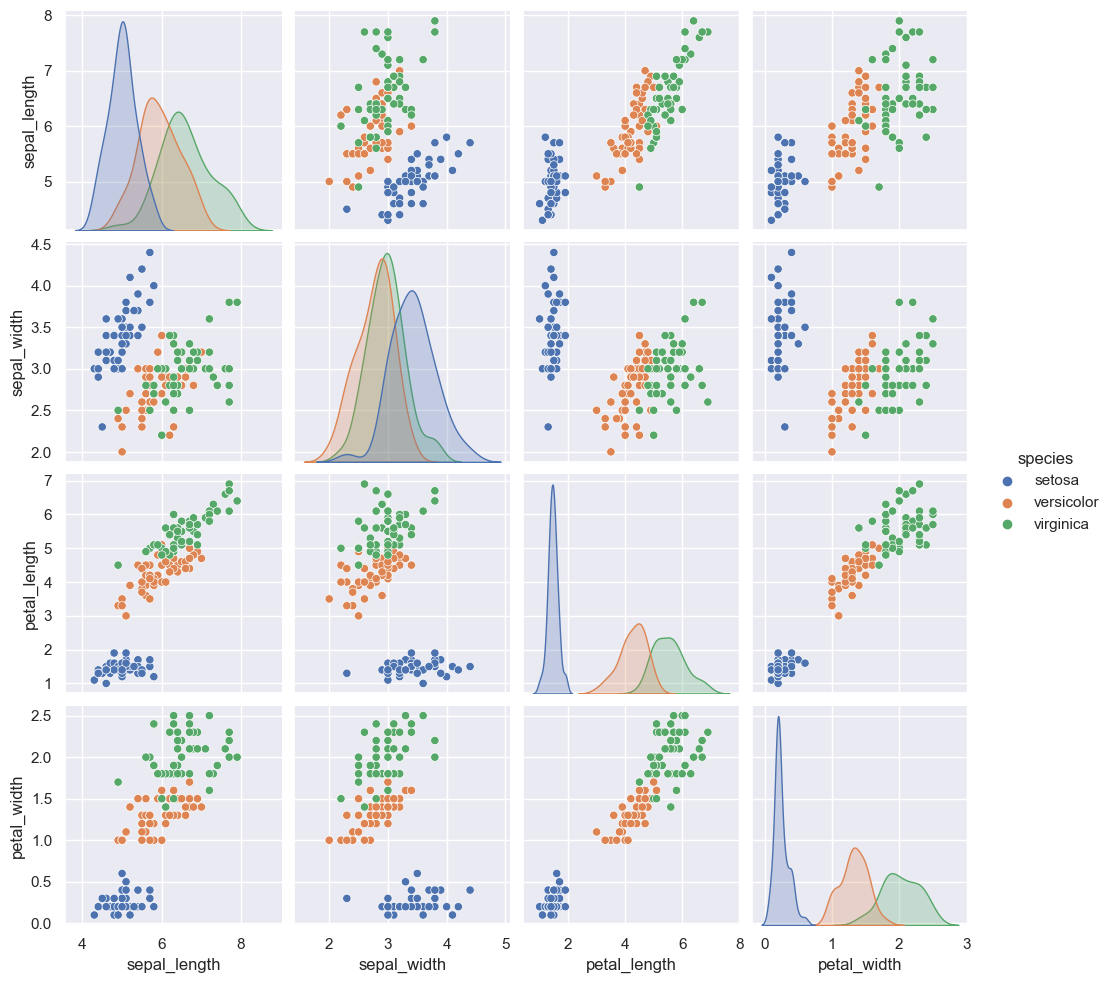

In [59]:
import seaborn as sns
sns.set()

df = sns.load_dataset("iris") # built-in dataset in seaborn 
print(df.describe())
sns.pairplot(df, hue="species");

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


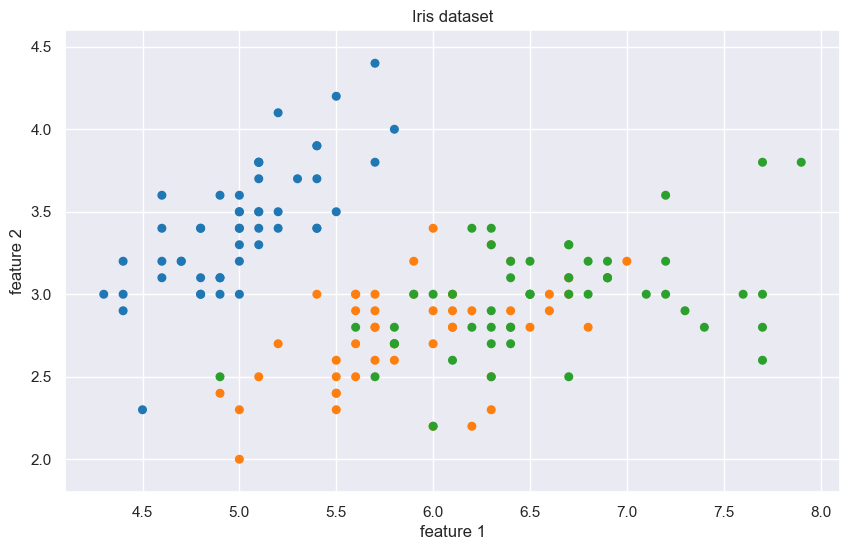

In [64]:
# import data, scikit-learn also has this dataset built-in
iris = load_iris()

# For easy plotting and interpretation, we only use first 2 features here. 
# We're throwing away useful information - don't do this at home! 
X = iris.data[:,:2]  
y = iris.target

# Create color maps
clrs = sns.color_palette("tab10").as_hex();
print(clrs)
cmap_bold = matplotlib.colors.ListedColormap(clrs[:3])

# plot data
plt.scatter(X[:, 0], X[:, 1], c=y,  marker="o", cmap=cmap_bold, s=30)

x_min, x_max = X[:, 0].min() - padding, X[:, 0].max() + padding
y_min, y_max = X[:, 1].min() - padding, X[:, 1].max() + padding
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)    
plt.title('Iris dataset')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.show()

We see that it would be fairly easy to separate the "blue" irises from the two classes. However, separating the "green" and "orange" ones would be a challenge. 

There are three classes, so we can't apply logistic regression. (This isn't completely true; there are extensions of logistic regression to handle more classes, but these are not very popular.) Instead we'll use k-NN. 

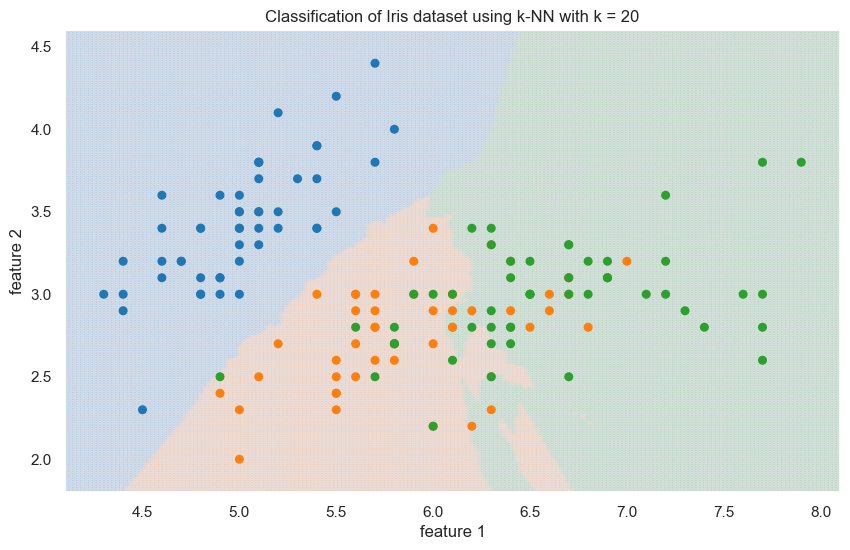

In [65]:
## set up the model, k-NN classification with k = ?  
k = 20
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(X, y)

# plot classification 
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),np.linspace(y_min, y_max, 200))
zz = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, zz, cmap=cmap_bold, alpha=0.05, shading='gouraud')

# plot data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=30)

plt.title('Classification of Iris dataset using k-NN with k = '+ str(k))
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)    
plt.show()

In [66]:
print('Confusion Matrix:')
y_pred = clf.predict(X)
print(metrics.accuracy_score(y_true=y, y_pred=y_pred))
print(metrics.confusion_matrix(y_true = y, y_pred = y_pred))


Confusion Matrix:
0.7866666666666666
[[50  0  0]
 [ 0 31 19]
 [ 0 13 37]]


Now, we've only done this with two dimensions, what happens if we do it with all of the dimensions?

In [67]:
k = 20
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(iris.data, y)

y_pred = clf.predict(iris.data)
print(metrics.accuracy_score(y_true=y, y_pred=y_pred))
print(metrics.confusion_matrix(y_true=y, y_pred=y_pred))

0.98
[[50  0  0]
 [ 0 48  2]
 [ 0  1 49]]


**Some preliminary comments on the parameter, $k$:** 

- For k large (say $k=100$), the *decision boundary* (boundary between classes) is smooth. The model is not very complex - it could basically be described by a few lines. The model has low variance in the sense that if the data were to change slightly, the model wouldn't change much. (There are many voters.) Since the model doesn't depend on the data very much, we might expect that it would *generalize* to new data points. 

- For k small (say $k=1$), the decision boundary is very wiggly. The model is very complex - it definitely can't be described by a few lines. The model has high variance in the sense that if the data were to change slightly, the model would change quite a bit. Since the model is very dependent on the dataset, we would say that it wouldn't generalize to new data points well. In this case, we would say that the model has overfit the data. (We saw a similar phenomena in regression using high degree polynomials.) 


**Questions:**
1. How to choose k? (more on this below)



## Model generalizability and cross-validation

In classification, and other prediction problems, we would like to develop a model on a dataset, the *training dataset*, that will not only perform well on that dataset but on similar data that the model hasn't yet seen, the *testing dataset*. If a model satisfies this criterion, we say that it is *generalizable*. 

If a model has 100% accuracy on the training dataset ($k=1$ in k-NN) but doesn't generalize to new data, then it isn't a very good model. We say that this model has *overfit* the data. On the other hand, it isn't difficult to see that we could also *underfit* the data (taking $k$ large in k-NN). In this case, the model isn't complex enough to have good accuracy on the training dataset. 

**Cross-validation** is a general method for assessing how the results of a predictive model (classification, regression,...) will *generalize* to an independent data set. In classification, cross-validation is a method for assessing how well the classification model will predict the class of points that weren't used to *train* the model. 

The idea of the method is simple: 
1. Split the dataset into two groups: the training dataset and the test dataset. 
2. Train the model on the training dataset. 
3. Check the accuracy of the model on the test dataset. 

In practice, you have to decide how to split the data into groups (i.e. how large the groups should be). You might also want to repeat the experiment so that the assessment doesn't depend on the way in which you split the data into groups. We'll worry about this in a later lecture. 

In [68]:
# Split into training and test sets
X,y = make_moons(n_samples=1000,random_state=1,noise=0.5)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.7)

for k in [1, 2, 5, 10, 50, 100]:
    print("k is:", k)
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    print("Accuracy Train:", metrics.accuracy_score(y_true=y_train, y_pred=clf.predict(X_train)))
    print("Accuracy Test:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred))
    print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))
    print()


k is: 1
Accuracy Train: 1.0
Accuracy Test: 0.7028571428571428
[[254 109]
 [ 99 238]]

k is: 2
Accuracy Train: 0.8433333333333334
Accuracy Test: 0.7071428571428572
[[310  53]
 [152 185]]

k is: 5
Accuracy Train: 0.84
Accuracy Test: 0.7685714285714286
[[275  88]
 [ 74 263]]

k is: 10
Accuracy Train: 0.8133333333333334
Accuracy Test: 0.7928571428571428
[[299  64]
 [ 81 256]]

k is: 50
Accuracy Train: 0.7866666666666666
Accuracy Test: 0.7971428571428572
[[278  85]
 [ 57 280]]

k is: 100
Accuracy Train: 0.77
Accuracy Test: 0.7842857142857143
[[270  93]
 [ 58 279]]



For now, I just want you to conceptually understand how generalizable k-NN is as we vary the parameter, k. 

<img src="BiasVarianceTradeoff.png" width="500">

$\qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad$ 
source: [this blog](https://blog.cambridgecoding.com/2016/03/24/misleading-modelling-overfitting-cross-validation-and-the-bias-variance-trade-off/)

As the model becomes more complex (k decreases), the accuracy always increases for the training dataset. But, at some point, it starts to overfit the data and the accuracy decreases for the test dataset! Cross validation techniques will allow us to find the sweet-spot for the parameter k! (Think: Goldilocks and the Three Bears.)


Let's look at the decision boundaries for the two moons dataset. You can use the *train_test_split* function in scikit-learn to split the dataset into a training dataset and a test dataset. 

In [69]:
def detect_plot_dimension(X, h=0.02, b=0.05):
    x_min, x_max = X[:, 0].min() - b, X[:, 0].max() + b
    y_min, y_max = X[:, 1].min() - b, X[:, 1].max() + b
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    dimension = xx, yy
    return dimension
 
def detect_decision_boundary(dimension, model):
    xx, yy = dimension  # unpack the dimensions
    boundary = model.predict(np.c_[xx.ravel(), yy.ravel()])
    boundary = boundary.reshape(xx.shape)  # Put the result into a color plot
    return boundary
 
def plot_decision_boundary(panel, dimension, boundary, colors=['#DADDED', '#FBD8D8']):
    xx, yy = dimension  # unpack the dimensions
    panel.contourf(xx, yy, boundary, cmap=matplotlib.colors.ListedColormap(colors), alpha=1)
    panel.contour(xx, yy, boundary, colors="g", alpha=1, linewidths=0.5)  # the decision boundary in green
 
def plot_dataset(panel, X, y, colors=["#EE3D34", "#4458A7"], markers=["x", "o"]):
    panel.scatter(X[y == 1, 0], X[y == 1, 1], color=colors[0], marker=markers[0])
    panel.scatter(X[y == 0, 0], X[y == 0, 1], color=colors[1], marker=markers[1])
 
def calculate_prediction_error(model, X, y):
    yPred = model.predict(X)
    score = round(metrics.accuracy_score(y, yPred), 2)
    return score
 
def plot_prediction_error(panel, dimension, score, b=.3):
    xx, yy = dimension  # unpack the dimensions
    panel.text(xx.max() - b, yy.min() + b, ('%.2f' % score).lstrip('0'), size=15, horizontalalignment='right')
 
def explore_fitting_boundaries(model, n_neighbors, datasets, width):  
    # determine the height of the plot given the aspect ration of each panel should be equal
    height = float(width)/len(n_neighbors) * len(datasets.keys())
 
    nrows = len(datasets.keys())
    ncols = len(n_neighbors)
 
    # set up the plot
    figure, axes = plt.subplots(
        nrows,
        ncols,
        figsize=(width, height),
        sharex=True,
        sharey=True
    )
 
    dimension = detect_plot_dimension(X, h=0.02)  # the dimension each subplot based on the data
 
    # Plotting the dataset and decision boundaries
    i = 0
    for n in n_neighbors:
        model.n_neighbors = n
        model.fit(datasets["Training Set"][0], datasets["Training Set"][1])
        boundary = detect_decision_boundary(dimension, model)
        j = 0
        for d in datasets.keys():
            try:
                panel = axes[j, i]
            except (TypeError, IndexError):
                if (nrows * ncols) == 1:
                    panel = axes
                elif nrows == 1:  # if you only have one dataset
                    panel = axes[i]
                elif ncols == 1:  # if you only try one number of neighbors
                    panel = axes[j]
            plot_decision_boundary(panel, dimension, boundary)  # plot the decision boundary
            plot_dataset(panel, X=datasets[d][0], y=datasets[d][1])  # plot the observations
            score = calculate_prediction_error(model, X=datasets[d][0], y=datasets[d][1])
            plot_prediction_error(panel, dimension, score, b=0.2)  # plot the score
 
            # make compacted layout
            panel.set_frame_on(False)
            panel.set_xticks([])
            panel.set_yticks([])
 
            # format the axis labels
            if i == 0:
                panel.set_ylabel(d)
            if j == 0:
                panel.set_title('k={}'.format(n))
            j += 1
        i += 1   
 
    plt.subplots_adjust(hspace=0, wspace=0)  # make compacted layout

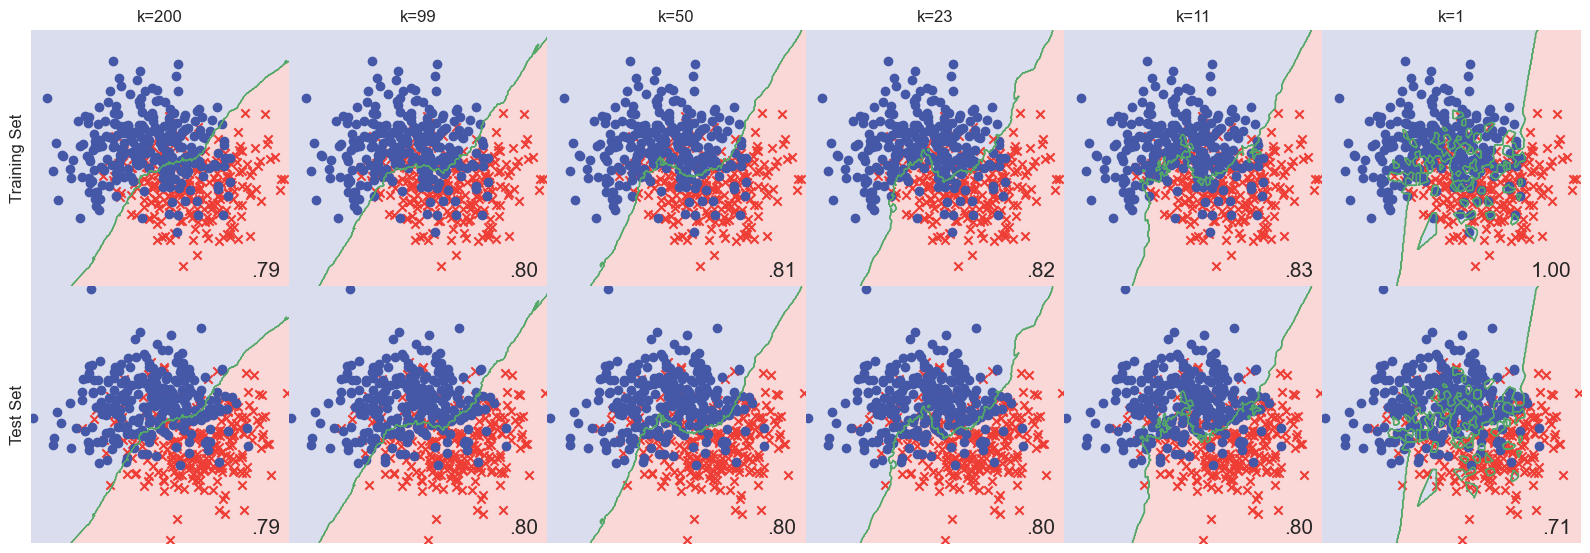

In [70]:
# Split into training and test sets
XTrain, XTest, yTrain, yTest = train_test_split(X, y, random_state=1, test_size=0.5)

# specify the model and settings
model = KNeighborsClassifier()
n_neighbors = [200, 99, 50, 23, 11, 1]
datasets = {
    "Training Set": [XTrain, yTrain],
    "Test Set": [XTest, yTest]
}
width = 20

explore_fitting_boundaries(model=model, n_neighbors=n_neighbors, datasets=datasets, width=width)


## Conclusions and take-away

1. k-NN is a very simple method that can be used for classification. (It can be used for regression too! How?)  
2. Model accuracy (measured on the training dataset) and generalizability (measured on the testing dataset) are both important and often in contention with one another. 
3. Model accuracy can be measured using the confusion matrix, precision, recall, F-measure, or the Jaccard similarity score. Generalizability can be measured via cross validation. 
4. Picking parameters in models (such as k in k-NN) is non-trivial, but can be done via cross validation. 


### Classification method preview
For a quick preview of other classification methods, see the comparison [here](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html).

![](http://scikit-learn.org/stable/_images/sphx_glr_plot_classifier_comparison_001.png)
